<a href="https://colab.research.google.com/github/divyalaldinani/Deep-Learning-in-TensorFlow/blob/main/05_transfer_learning_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Jan 14 19:45:54 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!nvidia-smi

Tue Jan 14 19:45:55 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
!wget https://github.com/divyalaldinani/Deep-Learning-in-TensorFlow/blob/main/extras/helper_functions.py

--2025-01-14 19:45:55--  https://github.com/divyalaldinani/Deep-Learning-in-TensorFlow/blob/main/extras/helper_functions.py
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘helper_functions.py’

helper_functions.py     [ <=>                ] 281.55K  --.-KB/s    in 0.03s   

2025-01-14 19:45:56 (10.6 MB/s) - ‘helper_functions.py’ saved [288306]



In [7]:
from helper_functions import pred_and_plot, plot_loss_curves, unzip_folder, walk_through_directory, view_random_image

### Downloading the dataset

In [8]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_folder("10_food_classes_10_percent.zip")

--2025-01-14 19:48:10--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.188.207, 108.177.98.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.188.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   225MB/s    in 0.7s    

2025-01-14 19:48:11 (225 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [9]:
walk_through_directory('/content/10_food_classes_10_percent')

2 directories and 0 files in /content/10_food_classes_10_percent
10 directories and 0 files in /content/10_food_classes_10_percent/train
0 directories and 75 files in /content/10_food_classes_10_percent/train/grilled_salmon
0 directories and 75 files in /content/10_food_classes_10_percent/train/chicken_wings
0 directories and 75 files in /content/10_food_classes_10_percent/train/steak
0 directories and 75 files in /content/10_food_classes_10_percent/train/fried_rice
0 directories and 75 files in /content/10_food_classes_10_percent/train/chicken_curry
0 directories and 75 files in /content/10_food_classes_10_percent/train/hamburger
0 directories and 75 files in /content/10_food_classes_10_percent/train/ramen
0 directories and 75 files in /content/10_food_classes_10_percent/train/pizza
0 directories and 75 files in /content/10_food_classes_10_percent/train/sushi
0 directories and 75 files in /content/10_food_classes_10_percent/train/ice_cream
10 directories and 0 files in /content/10_foo

In [10]:
train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'

#### Input Data Pipelines
**using tf.keras.preprocessing.image_dataset_from_directory() -> creates tf.data.Dataset object, explore [here](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)**

In [11]:
import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE= 32
IMAGE_SIZE = (224, 224)

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                         batch_size=BATCH_SIZE,
                                                                         image_size=IMAGE_SIZE,
                                                                         shuffle=True,
                                                                         label_mode='categorical' # one hot encoded
                                                                         )

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                             batch_size=BATCH_SIZE,
                                                             image_size = IMAGE_SIZE,
                                                             shuffle=True,
                                                             label_mode='categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [12]:
train_data_10_percent

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [13]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [14]:
# see a batch of Data

for images, labels in train_data_10_percent.take(1):
    print(images, labels)

tf.Tensor(
[[[[9.76530609e+01 7.90663223e+01 6.50663223e+01]
   [1.04392860e+02 8.82500000e+01 7.33214264e+01]
   [1.09520409e+02 9.69591827e+01 8.36683655e+01]
   ...
   [2.44423492e+02 2.37423492e+02 2.19423492e+02]
   [2.46760208e+02 2.39760208e+02 2.21760208e+02]
   [2.48000000e+02 2.41000000e+02 2.23000000e+02]]

  [[1.06326530e+02 8.95204086e+01 7.75867386e+01]
   [1.11239799e+02 9.68877640e+01 8.40918427e+01]
   [1.50612244e+02 1.41198990e+02 1.26897964e+02]
   ...
   [2.40857162e+02 2.33857162e+02 2.15857162e+02]
   [2.45071442e+02 2.38071442e+02 2.20071442e+02]
   [2.47000000e+02 2.40000000e+02 2.22000000e+02]]

  [[1.15163269e+02 1.02295921e+02 9.33724518e+01]
   [1.54887756e+02 1.45117355e+02 1.34989807e+02]
   [2.00071426e+02 1.92836746e+02 1.79790833e+02]
   ...
   [2.40357193e+02 2.33357193e+02 2.15357193e+02]
   [2.43642868e+02 2.36642868e+02 2.18642868e+02]
   [2.44571426e+02 2.37571426e+02 2.19571426e+02]]

  ...

  [[1.41214325e+02 5.36428566e+01 5.27959023e+01]
   [1

### Creating model with `tf.keras.applications`

In [15]:
# from tf.keras.applications import MobileV3Small

base_model = tf.keras.applications.MobileNetV3Small(
    weights='imagenet',
    input_shape=IMAGE_SIZE+(3,),
    include_top=False,
    include_preprocessing = True
)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name = 'input_layer')

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_layer')(x) #returns (batch_size, channels)

outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x) # trains on batch_size requires (batch_size, features)

model_0 = tf.keras.Model(inputs, outputs)

model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_0 = model_0.fit(x = train_data_10_percent,
                        validation_data=test_data,
                        epochs=5)

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.1610 - loss: 2.5350 - val_accuracy: 0.3400 - val_loss: 1.9145
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 13s 276ms/step - accuracy: 0.4100 - loss: 1.7634 - val_accuracy: 0.5616 - val_loss: 1.4410
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 9s 227ms/step - accuracy: 0.5984 - loss: 1.3725 - val_accuracy: 0.6572 - val_loss: 1.1903
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 219ms/step - accuracy: 0.6583 - loss: 1.1300 - val_accuracy: 0.7152 - val_loss: 1.0291
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 274ms/step - accuracy: 0.7425 - loss: 0.9626 - val_accuracy: 0.7424 - val_loss: 0.9314


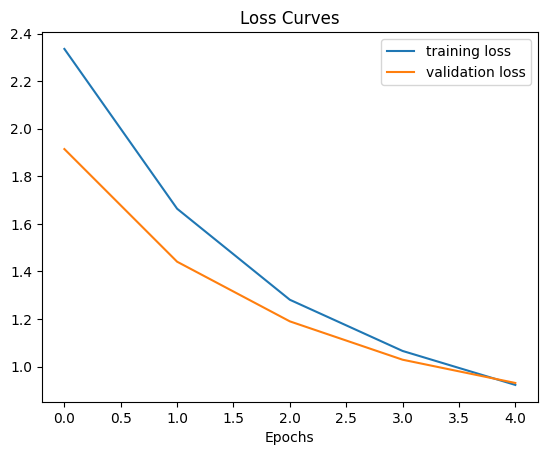

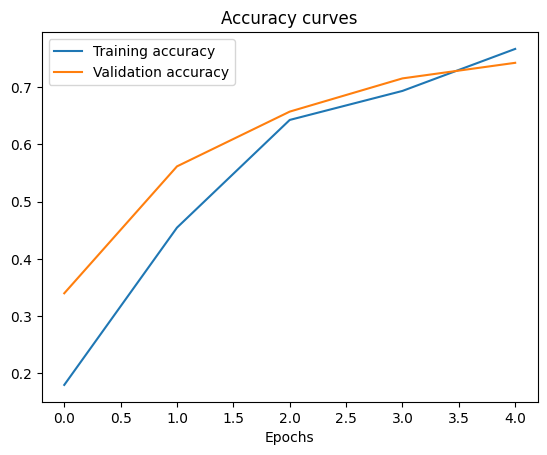

In [16]:
plot_loss_curves(history_0)

In [17]:
# checking out layers in model

for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_layer
1 rescaling
2 conv
3 conv_bn
4 activation
5 expanded_conv_depthwise_pad
6 expanded_conv_depthwise
7 expanded_conv_depthwise_bn
8 re_lu
9 expanded_conv_squeeze_excite_avg_pool
10 expanded_conv_squeeze_excite_conv
11 expanded_conv_squeeze_excite_relu
12 expanded_conv_squeeze_excite_conv_1
13 re_lu_1
14 expanded_conv_squeeze_excite_mul
15 expanded_conv_project
16 expanded_conv_project_bn
17 expanded_conv_1_expand
18 expanded_conv_1_expand_bn
19 re_lu_2
20 expanded_conv_1_depthwise_pad
21 expanded_conv_1_depthwise
22 expanded_conv_1_depthwise_bn
23 re_lu_3
24 expanded_conv_1_project
25 expanded_conv_1_project_bn
26 expanded_conv_2_expand
27 expanded_conv_2_expand_bn
28 re_lu_4
29 expanded_conv_2_depthwise
30 expanded_conv_2_depthwise_bn
31 re_lu_5
32 expanded_conv_2_project
33 expanded_conv_2_project_bn
34 expanded_conv_2_add
35 expanded_conv_3_expand
36 expanded_conv_3_expand_bn
37 activation_1
38 expanded_conv_3_depthwise_pad
39 expanded_conv_3_depthwise
40 expanded_conv_3_

In [18]:
for layer_number, layer in enumerate(model_0.layers):
    print(layer_number, layer.name)

0 input_layer
1 MobileNetV3Small
2 global_average_pooling_layer
3 output_layer


In [19]:
base_model.summary() #trained mobile net whose layers are frozen

Model: "MobileNetV3Small"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv (Conv2D)             │ (None, 112, 112, 16)   │            432 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_bn                   │ (None, 112, 112, 16)   │             64 │ conv[0][0]             │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 16)   │              0 │ conv_bn[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 113, 113, 16)   │              0 │ activation[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 56, 56, 16)     │            144 │ expanded_conv_depthwi… │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 56, 56, 16)     │             64 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu (ReLU)              │ (None, 56, 56, 16)     │              0 │ expanded_conv_depthwi… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │              0 │ re_lu[0][0]            │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │            136 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 8)        │              0 │ expanded_conv_squeeze… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_squeeze_ex… │ (None, 1, 1, 16)       │            144 │ expanded_conv_squeeze… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 1, 1, 16)       │              0 │ expanded_conv_squeeze… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_1 (ReLU)            │ (None, 1, 1, 16)       │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)  

 Total params: 939,120 (3.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 939,120 (3.58 MB)

In [20]:
model_0.summary() # only weights, baises in last layer can be modified

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ MobileNetV3Small (Functional)        │ (None, 7, 7, 576)           │         939,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 576)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           5,770 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 956,432 (3.65 MB)

 Trainable params: 5,770 (22.54 KB)

 Non-trainable params: 939,120 (3.58 MB)

 Optimizer params: 11,542 (45.09 KB)

### Training other models

In [41]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_folder('10_food_classes_1_percent.zip')

--2025-01-14 20:16:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.135.207, 74.125.142.207, 74.125.195.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.135.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.2’

10_food_classes_1_p 100%[===================>] 127.42M   170MB/s    in 0.7s    

2025-01-14 20:16:35 (170 MB/s) - ‘10_food_classes_1_percent.zip.2’ saved [133612354/133612354]



In [42]:
train_dir_10_percent = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_1_percent/test'


In [43]:
walk_through_directory('10_food_classes_1_percent')

2 directories and 0 files in 10_food_classes_1_percent
10 directories and 0 files in 10_food_classes_1_percent/train
0 directories and 7 files in 10_food_classes_1_percent/train/grilled_salmon
0 directories and 7 files in 10_food_classes_1_percent/train/chicken_wings
0 directories and 7 files in 10_food_classes_1_percent/train/steak
0 directories and 7 files in 10_food_classes_1_percent/train/fried_rice
0 directories and 7 files in 10_food_classes_1_percent/train/chicken_curry
0 directories and 7 files in 10_food_classes_1_percent/train/hamburger
0 directories and 7 files in 10_food_classes_1_percent/train/ramen
0 directories and 7 files in 10_food_classes_1_percent/train/pizza
0 directories and 7 files in 10_food_classes_1_percent/train/sushi
0 directories and 7 files in 10_food_classes_1_percent/train/ice_cream
10 directories and 0 files in 10_food_classes_1_percent/test
0 directories and 250 files in 10_food_classes_1_percent/test/grilled_salmon
0 directories and 250 files in 10_foo

In [44]:
import tensorflow as tf

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode ='categorical',
                                                                           batch_size=BATCH_SIZE,
                                                                           image_size=IMAGE_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode='categorical',
                                                                batch_size = BATCH_SIZE,
                                                                image_size=IMAGE_SIZE)



Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [47]:
### Adding data augmentaion directly into the model
from tensorflow.keras import layers

# generates 1 augmented Image per input image
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomWidth(0.2),
    layers.RandomHeight(0.2),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2)
], name= 'data_augmentation')

image path: 10_food_classes_1_percent/train/steak/60633.jpg


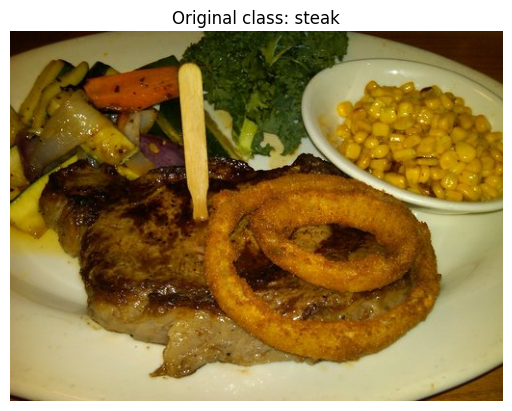

In [56]:
view_random_image(train_data_10_percent.class_names, train_dir_10_percent)

(-0.5, 583.5, 333.5, -0.5)

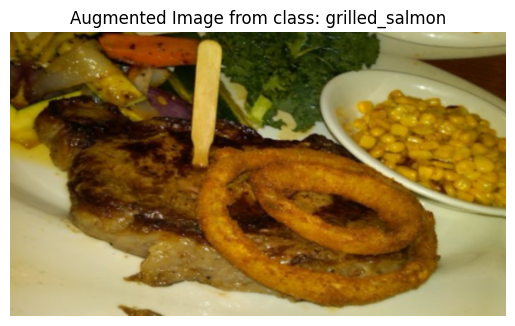

In [72]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('10_food_classes_1_percent/train/steak/60633.jpg')
augmented_image = data_augmentation(tf.expand_dims(img, axis=0))
plt.figure()
# plt.imshow(tf.squeeze(augmented_image)/255.)
augmented_image = tf.cast(tf.squeeze(augmented_image), dtype=tf.uint8)
plt.imshow(augmented_image)
plt.title('Augmented Image from class: grilled_salmon')
# plt.title(f"Augme")
plt.axis('Off')

In [73]:
print(augmented_image)

tf.Tensor(
[[[ 90  64   0]
  [ 88  60   0]
  [ 94  65   0]
  ...
  [178 173 115]
  [178 172 114]
  [178 172 113]]

 [[ 90  63   0]
  [ 87  58   0]
  [ 91  61   0]
  ...
  [179 173 115]
  [178 173 115]
  [178 172 114]]

 [[ 91  63   0]
  [ 88  59   0]
  [ 91  60   0]
  ...
  [179 173 115]
  [179 173 115]
  [178 172 114]]

 ...

 [[195 183 134]
  [195 184 134]
  [195 185 135]
  ...
  [190 183 131]
  [190 183 131]
  [190 183 132]]

 [[196 184 135]
  [196 185 136]
  [196 186 136]
  ...
  [189 182 130]
  [189 183 131]
  [189 183 132]]

 [[197 185 134]
  [198 186 135]
  [198 186 137]
  ...
  [190 183 129]
  [190 183 130]
  [190 183 131]]], shape=(334, 584, 3), dtype=uint8)


### Model 1: Feature extraction using transfer learning on 1% of data + data augmentation

In [93]:
def preprocess(image, label):
    image = tf.image.resize(image, [224, 224])  # Resize image to required shape
    image = tf.cast(image, tf.float32) / 255.0  # Normalize to [0, 1]
    return image, label

train_data_1_percent = train_data_1_percent.map(preprocess).batch(32)
test_data = test_data.map(preprocess).batch(32)


In [95]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.MobileNetV3Small(include_top=False,
                                                    # input_shape=input_shape,
                                                    weights='imagenet',
                                                    include_preprocessing=False
                                                    )#normalizes the image values

base_model.trainable=False

inputs = layers.Input(shape=input_shape, name='input_layer')

# adds in data augmentation as a layer
x = data_augmentation(inputs)

# inputs after data augmentation, and freeze base model weights
x = base_model(x, training = False)

x = layers.GlobalAveragePooling2D(name='global_average_poooling_layer')(x)

outputs = layers.Dense(10, activation='softmax', name='output_layer')(x) # 10 -> 10 categories in our data

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data_1_percent,
                        epochs = 5,
                        validation_data=test_data)


/usr/local/lib/python3.10/dist-packages/keras/src/applications/mobilenet_v3.py:452: UserWarning: `input_shape` is undefined or non-square, or `rows` is not 224. Weights for input shape (224, 224) will be loaded as the default.
  return MobileNetV3(


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 384, 512, 3), found shape=(None, 224, 224, 3)[0m

Arguments received by Sequential.call():
  • args=('<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=input_layer>',)
  • kwargs={'mask': 'None'}

In [90]:
inputs

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=input_layer>